# ANALYZING LOAN PREDICTION DATASET USING PYTHON

In this project,we are trying to analyze the data of a finance company who deals in different types of loans. They first check the eligibility with some checklist and the provide loans on the basis of it. The sheet contains data of approx 614 customers ranging from Urban to rural areas, graduate/Non graduate customers. 

**Here I have divided this entire project into three different section.**
1. Downloading the dataset and performing some cleaning(if required) and deriving some basic information of the data.
2. Visualizing the datasets using graphs 
3. Inferences and Future work that can be done using this dataset.

we have used kaggle as the source to download the data. We have used https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas to learn about the basic libraries that we are going to use here.

## Downloading the Dataset

**here we will download our dataset.**
**we are using kaggle as our source for our data.**

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ankitkarmakar21
Your Kaggle Key: ········


100%|██████████| 12.6k/12.6k [00:00<00:00, 11.2MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './loan-prediction-problem-dataset'

In [5]:
import os
os.listdir(data_dir)

['test_Y3wMUE5_7gLdaTN.csv', 'train_u6lujuX_CVtuZ9i.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "analyzing loan prediction dataset using python" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ankitkarmakar34/analyzing-loan-prediction-dataset-using-python" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ankitkarmakar34/analyzing-loan-prediction-dataset-using-python


'https://jovian.ai/ankitkarmakar34/analyzing-loan-prediction-dataset-using-python'

## READING DATASET
#### We will import some important libraries which we will use in this project.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df=pd.read_csv('./loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## DATA CLEANING

In [14]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**We can see that Gender,Married,Self employed,Dependents have NA values. These columns are object type and we have replace these NA values by taking mode of the respective column.** 

In [15]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [16]:
y=df['LoanAmount'].describe()
print("Mode of Loan Amount",df['LoanAmount'].mode())
print(y)

Mode of Loan Amount 0    120.0
dtype: float64
count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


**As mean is generally affected by outliers,we chose NA values of loan amount to be replaced by median of this column.**

In [17]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

**As Terms are mostly 360 months, we chose to replace NA values by mode of this column.**
**Similary we chose to replace the credit history by mode of that column.**

In [18]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

**CHECK**

In [19]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## EXPLORATORY ANALYSIS

In [20]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [21]:
df["Married"].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [22]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [23]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [24]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [25]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [26]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [27]:
grp=df.groupby('Loan_Status')["Self_Employed"]

In [28]:
grp.get_group("Y").value_counts()

No     366
Yes     56
Name: Self_Employed, dtype: int64

In [29]:
grp.get_group("N").value_counts()

No     166
Yes     26
Name: Self_Employed, dtype: int64

In [30]:
grp1=df.groupby('Loan_Status')["Education"]

In [31]:
grp1.get_group("N").value_counts()

Graduate        140
Not Graduate     52
Name: Education, dtype: int64

In [32]:
grp2=df.groupby('Loan_Status')["ApplicantIncome"]

In [33]:
grp2.get_group("N").value_counts().head(20)

4583     4
5000     3
10000    3
2600     3
4166     3
3167     2
2400     2
2378     2
3418     2
6000     2
3750     2
3400     2
2947     2
4333     2
81000    1
1500     1
2889     1
2755     1
2726     1
7441     1
Name: ApplicantIncome, dtype: int64

## VISUALIZING DATA USING CHARTS
#### We are using Matplotlib and seaborn libraries.

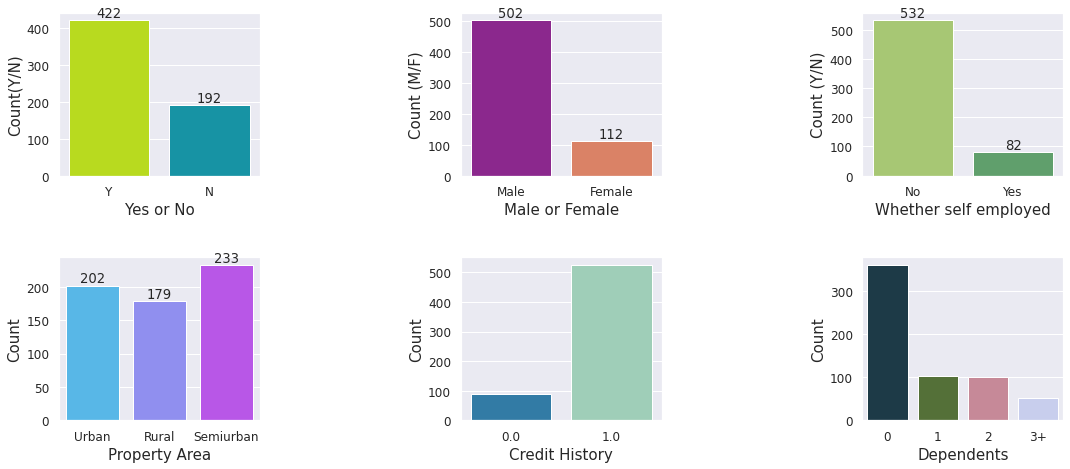

In [34]:
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale = 1.1)
sns.set_style("darkgrid")
plt.figure(figsize=(18,12))
plt.subplot(3,3,1)
plt.subplots_adjust(wspace=1,hspace=.5)


a1=sns.countplot('Loan_Status',data=df,palette="nipy_spectral_r")
a1.bar_label(a1.containers[0])
a1.set_xlabel("Yes or No",size=15)
a1.set_ylabel("Count(Y/N)",size=15)


plt.subplot(3,3,2)
a2=sns.countplot('Gender',data=df,palette="plasma")
a2.bar_label(a2.containers[0])
a2.set_xlabel("Male or Female",size=15)
a2.set_ylabel("Count (M/F)",size=15);

plt.subplot(3,3,3)
a3=sns.countplot('Self_Employed',data=df,palette="summer_r")
a3.bar_label(a3.containers[0])
a3.set_xlabel("Whether self employed",size=15)
a3.set_ylabel("Count (Y/N)",size=15);

plt.subplot(3,3,4)
a4=sns.countplot('Property_Area',data=df,palette="cool")
a4.bar_label(a4.containers[0])
a4.set_xlabel("Property Area",size=15)
a4.set_ylabel("Count",size=15);


plt.subplot(3,3,5)
a5=sns.countplot('Credit_History',data=df,palette="YlGnBu_r")
a5.set_xlabel("Credit History",size=15)
a5.set_ylabel("Count",size=15);

plt.subplot(3,3,6)
a6=sns.countplot('Dependents',data=df,palette="cubehelix")
a6.set_xlabel("Dependents",size=15)
a6.set_ylabel("Count",size=15);

plt.show()




***Here we have plotted some graphs. We can see that Loan approved were more than loans rejected. The appliers are mostly Males and Working (Not self employed).Most of them have good credit history and the appliers are mostly from urban and semiurban areas so these loans can be loans for houses.***

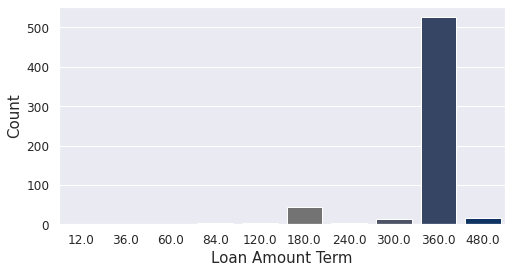

In [35]:
sns.set(font_scale = 1.1)
sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
a7=sns.countplot('Loan_Amount_Term',data=df,palette="cividis_r")
a7.set_xlabel("Loan Amount Term",size=15)
a7.set_ylabel("Count",size=15);

***We can see that most loan amount term are for 360 months (i.e. 30 Years). We can reach to a conclusion that these are housing loans as we have seen above.***

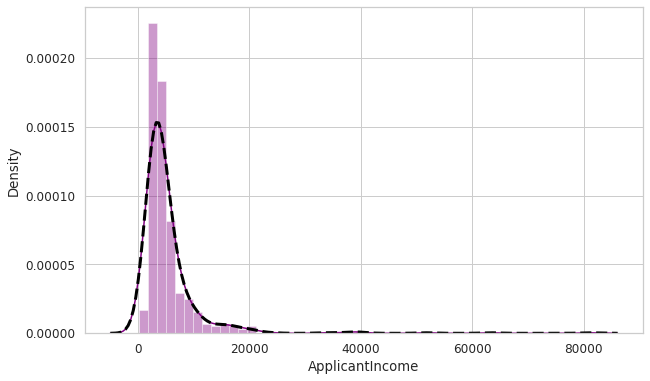

In [36]:
sns.set(font_scale = 1.1)
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plot=sns.distplot(df['ApplicantIncome'],color='purple',kde=True);
sns.kdeplot(data=df, x="ApplicantIncome", color='black',ax=plot,lw='3',ls='--');

***Most of the appliers have income ranging from 0 to 20,000. Let's us see if there are any outliers.***

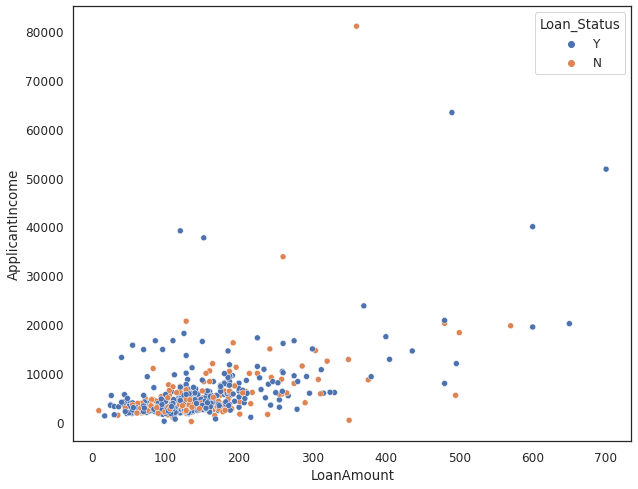

In [37]:
sns.set(font_scale = 1.1)
sns.set_style("white")
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['LoanAmount'],y=df['ApplicantIncome'],hue=df['Loan_Status'],sizes=(40, 400));

***Most of the Applicants have income between 0 to 20,000 with loan amount ranging from 0 to 300.***

***We can see that a applier with income of 80000 had his loan rejected. This means that greater applicant income doesnot have affect on approval. We have to look on other criteria as to why the loan was rejected.***

**Why was his loan rejected?
We will answer this by filtering that specific row.**

In [38]:
grp3=df.groupby('Loan_Status')['Credit_History','Dependents','Property_Area']

In [39]:
grp3.get_group("Y").value_counts()

Credit_History  Dependents  Property_Area
1.0             0           Semiurban        106
                            Urban             71
                            Rural             67
                2           Semiurban         30
                1           Urban             28
                            Semiurban         28
                2           Urban             26
                            Rural             19
                3+          Rural             13
                            Semiurban         11
                1           Rural              9
                3+          Urban              7
0.0             0           Rural              2
                            Semiurban          1
                3+          Urban              1
                            Semiurban          1
                2           Semiurban          1
                1           Semiurban          1
dtype: int64

In [40]:
x=df['ApplicantIncome']>80000

In [41]:
df[x]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


***We can find as why the loan was rejected for a applicant income with 81000***

1.) Credit History is not good. Most of the approved applications had credit history of 1.0

2.) Most of the loan which was approved had dependents of 0 and belonged to either urban or semi-urban area.

**Lets Save our Work**

In [42]:
import jovian

In [43]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ankitkarmakar34/analyzing-loan-prediction-dataset-using-python" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ankitkarmakar34/analyzing-loan-prediction-dataset-using-python


'https://jovian.ai/ankitkarmakar34/analyzing-loan-prediction-dataset-using-python'

## Asking and Answering Questions

We will try to answer some questions about the dataset to reach to a conclusion.



#### Q1: What percentage of the total loan applied were approved?

 <b style='color:Blue'> <font size="2.5">About 69% of the applied loans were approved. This means the more loans were approved than rejected.</b></font>

#### Q2: Does loan approval depend on dependents of applicant?

 <b style='color:Blue'> <font size="2.5"> The percentage of applicants with either 0 or 2 dependents have got their loan approved is higher.</b></font>

#### Q3: What is the impact of credit history on loan approval?

 <b style='color:Blue'> <font size="2.5">
    Around 98% Loans that were approved had applicant with good credit history.
   </b></font>


#### Q4: Does high applicant income result in loan approval?

 <b style='color:Blue'> <font size="2.5">
    No, Loan of Applicant with income of 81000 was rejected.
   </b></font>


In [44]:
import jovian

In [45]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ankitkarmakar34/analyzing-loan-prediction-dataset-using-python" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ankitkarmakar34/analyzing-loan-prediction-dataset-using-python


'https://jovian.ai/ankitkarmakar34/analyzing-loan-prediction-dataset-using-python'

# Inferences and Conclusion

1.) About 69% of the applied loans were approved. This means the more loans were approved than rejected.

2.) The loan approved for Non Self employed candidates are more than self employed candidates. but the loan rejected are also higher in non self employed candidates. Thus we cannot have any relation between loan approval with profession.

3.) Married applicants are more than unmarried applicants (more than 65%).

4.) Most of the appliers are from Urban and Semi-Urban areas. These are most likely loans applied for housing.

5.) Most of the applied loans have terms more than 360 months. These loans indicate more likely loan against property and those with 180 months are more likely personal loans.

6.) Most of the applicants have income from 0 to 20,000. Higher Loan Amount has no affect on loan approval.

In [46]:
import jovian

In [47]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ankitkarmakar34/analyzing-loan-prediction-dataset-using-python" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ankitkarmakar34/analyzing-loan-prediction-dataset-using-python


'https://jovian.ai/ankitkarmakar34/analyzing-loan-prediction-dataset-using-python'

## References and Future Work

**Here our basic aim was to get some details about loan approved and loan rejected. The above dataset can be used to predict if a new person who applies for loan is eligible to get loan. This can be done using ML techniques.**

### References

1.) https://www.geeksforgeeks.org/seaborn-color-palette/ - **We used this to pick colours for our chart to make it attractive.**

2.) https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/?ref=lbp - **Used this to have a overview of countplot.**

3.) https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas - **Use this to learn about pandas and other libraries in depth**

In [48]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>